# Quntitative and Visual Exploratory Datat Analysis(EDA) in the Jupyter Notebook with Python 


# How coronavirus (COVID 19) pandemic have been affected the UK road and vehicle traffic


In [1]:
#Import general python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import random
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#Import packages written by book's author
import thinkstats2
import thinkplot



In [2]:
#Read 'region_traffic_by_vehicle_type.csv' file

df=pd.read_csv('region_traffic_by_vehicle_type.csv')
df.head()

#This function selects the min in each column and highlights it in limegreen color
def highlight_min(s):    
    is_min = s == s.min()
    return ['background-color: limegreen' if v else '' for v in is_min]
 
#apply the previously defined function on dataframe
df.style.apply(highlight_min)

,id,year,region_id,ons_code,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,1,2015,9,E12000008,47896.880000,29761.740000,533579558.700000,493806054.100000,44161584807,317222382.300000,8045218862,2450646628.000000,55468478734
1,2,2001,7,E12000006,39287.500000,24412.120000,388797711.100000,343303508.100000,25942676594,296600668.700000,3929148042,2060673380.000000,32572402193
2,3,2018,7,E12000006,40003.125100,24856.790000,455873184.000000,328208516.400000,30647940894,214265260.800000,6476405328,2206569086.000000,39873389085
3,4,2014,6,E12000007,14842.840000,9222.910000,375712141.200000,420265200.700000,15782871411,357612058.600000,2838823044,646676139.100000,20046247854
4,5,1993,8,E12000003,31096.599000,19322.530000,231384512.000000,171230754.900000,16875994759,235884597.100000,2204277523,1624323587.000000,21111711220
5,6,2016,11,E12000001,16285.230000,10119.170000,95375436.490000,69008242.550000,9969855945,138366838.400000,1795423974,446772808.200000,12419427808
6,7,2014,4,W92000004,33917.150000,21075.140000,118969772.900000,147759763.900000,14291544254,161249624.700000,2703031042,684234825.000000,17987819509
7,8,1999,1,E12000009,49298.900000,30632.920000,229385521.700000,337947113.200000,21992348506,281961300.400000,2969538667,1555128869.000000,27136924456
8,9,2002,11,E12000001,16103.100000,10006.000000,92837900.100000,82176707.540000,9611238230,188304869.900000,1269809895,521693584.900000,11673223287
9,10,2017,5,E12000002,37147.110000,23082.140000,300534963.300000,258360166.800000,30199815819,208470393.100000,5522410759,1934788699.000000,38123845838


# Identify variables and it's attributes in the dataset

In [3]:
#Identify variables and it's attributes in the dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          308 non-null    int64  
 1   year                        308 non-null    int64  
 2   region_id                   308 non-null    int64  
 3   ons_code                    308 non-null    object 
 4   total_link_length_km        308 non-null    float64
 5   total_link_length_miles     308 non-null    float64
 6   pedal_cycles                308 non-null    float64
 7   two_wheeled_motor_vehicles  308 non-null    float64
 8   cars_and_taxis              308 non-null    int64  
 9   buses_and_coaches           308 non-null    float64
 10  lgvs                        308 non-null    int64  
 11  all_hgvs                    308 non-null    float64
 12  all_motor_vehicles          308 non-null    int64  
dtypes: float64(6), int64(6), object(1)


,id,year,region_id,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,154.500000,2006.500000,6.000000,35668.138322,22163.153701,2.660712e+08,2.620522e+08,2.198132e+10,2.696600e+08,3.599139e+09,1.535153e+09,2.764732e+10
std,89.056162,8.090892,3.167424,12717.436586,7902.248858,1.307807e+08,1.301287e+08,8.382201e+09,7.927410e+07,1.517611e+09,6.188434e+08,1.040807e+10
min,1.000000,1993.000000,1.000000,14350.446000,8916.950000,7.714637e+07,5.447085e+07,8.437843e+09,7.969603e+07,1.021850e+09,4.057985e+08,1.026226e+10
25%,77.750000,1999.750000,3.000000,31298.875000,19448.220000,1.912459e+08,1.746260e+08,1.626982e+10,2.023391e+08,2.474303e+09,7.957605e+08,2.012241e+10
50%,154.500000,2006.500000,6.000000,33829.321350,21020.565000,2.496182e+08,2.295675e+08,2.108493e+10,2.723380e+08,3.438353e+09,1.745691e+09,2.684081e+10
75%,231.250000,2013.250000,9.000000,47210.072500,29334.977500,3.497273e+08,3.515147e+08,2.585340e+10,3.328188e+08,4.438961e+09,1.965577e+09,3.239532e+10
max,308.000000,2020.000000,11.000000,59642.300000,37060.010000,8.757159e+08,6.062762e+08,4.557109e+10,4.362160e+08,8.863099e+09,2.653995e+09,5.766574e+10


# Here's the list of 5 variables with description and Histogram in this dataset which I’ve used during my analysis.
o	Pedal Cycle is a float cyclist on public highways and the paths next to them. This is the lowest level of cycling on the public highway since the 1990s.
o	Two Wheeled Motor Vehicles is a floating-point value during the pandemic.
o	Cars and Taxis is the integer type decreased in traffic level during the pandemic.
o	Buses and Coaches is a float type that were most heavily impacted during COVID 19 pandemic.
o	All motor Vehicles is an integer for the outcome of the pandemic time which is lowest annual estimate of car traffic in the last 29 years.


Text(0.5, 1.0, 'Histogram of all_motor_vehicles')

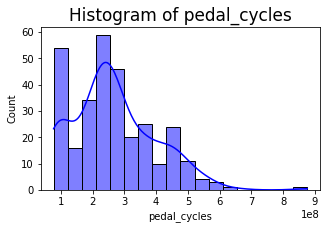

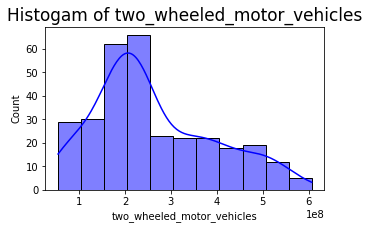

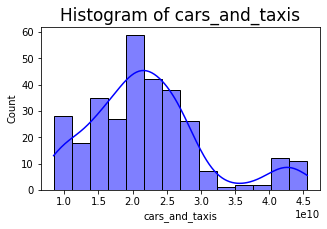

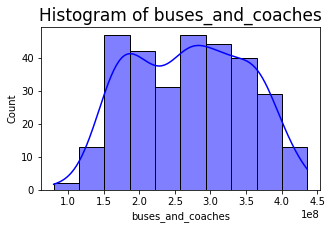

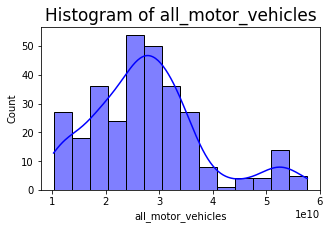

In [4]:
#Draw histogram of 5 variables we are working with

plt.figure(figsize=(5,3))
sns.histplot(df['pedal_cycles'], kde = True, color = 'blue')
plt.title('Histogram of pedal_cycles', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['two_wheeled_motor_vehicles'], kde = True, color = 'blue')
plt.title('Histogam of two_wheeled_motor_vehicles', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['cars_and_taxis'], kde = True, color = 'blue')
plt.title('Histogram of cars_and_taxis', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['buses_and_coaches'], kde = True, color = 'blue')
plt.title('Histogram of buses_and_coaches', fontsize=17)


plt.figure(figsize=(5,3))
sns.histplot(df['all_motor_vehicles'], kde = True, color = 'blue')
plt.title('Histogram of all_motor_vehicles', fontsize=17)



#  Mean std distribution and other values to describe the 5 choosen variables 

In [5]:
#Find mean std distribution and other values to describe the variables

df[['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'all_motor_vehicles']].describe()

,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,all_motor_vehicles
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.660712e+08,2.620522e+08,2.198132e+10,2.696600e+08,2.764732e+10
std,1.307807e+08,1.301287e+08,8.382201e+09,7.927410e+07,1.040807e+10
min,7.714637e+07,5.447085e+07,8.437843e+09,7.969603e+07,1.026226e+10
25%,1.912459e+08,1.746260e+08,1.626982e+10,2.023391e+08,2.012241e+10
50%,2.496182e+08,2.295675e+08,2.108493e+10,2.723380e+08,2.684081e+10
75%,3.497273e+08,3.515147e+08,2.585340e+10,3.328188e+08,3.239532e+10
max,8.757159e+08,6.062762e+08,4.557109e+10,4.362160e+08,5.766574e+10


# Create a PMF of buses and coaches variables 

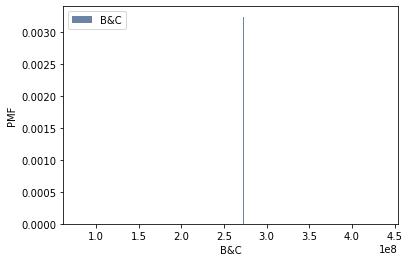

In [6]:
#PMF of buses_and_coaches


hist = thinkstats2.Hist(df['buses_and_coaches'], label='B&C')
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

thinkplot.Hist(pmf)
thinkplot.Config(xlabel='B&C', ylabel='PMF')  

# Create a CDF of all motor vehicles variable

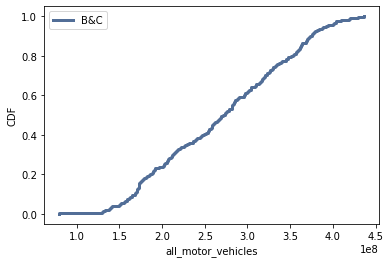

<Figure size 576x432 with 0 Axes>

In [7]:
#Use thinkstats2 to compute CDF of all_motor_vehicles

cdf = thinkstats2.Cdf(df['buses_and_coaches'], label='B&C')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='all_motor_vehicles', ylabel='CDF')

Mean, Var 27523301451.66556 9.841102482149687e+19
Sigma 9920233103.183456


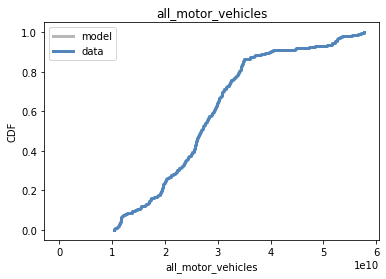

In [8]:
# estimate parameters: trimming outliers yields a better fit. Most of the code is from the book exercises.

all_motor_vehicles = df['all_motor_vehicles']
mu, var = thinkstats2.TrimmedMeanVar(all_motor_vehicles, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(all_motor_vehicles, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='all_motor_vehicles',
                 xlabel='all_motor_vehicles',
                 ylabel='CDF')

# Create coorelation between various variables

<AxesSubplot:>

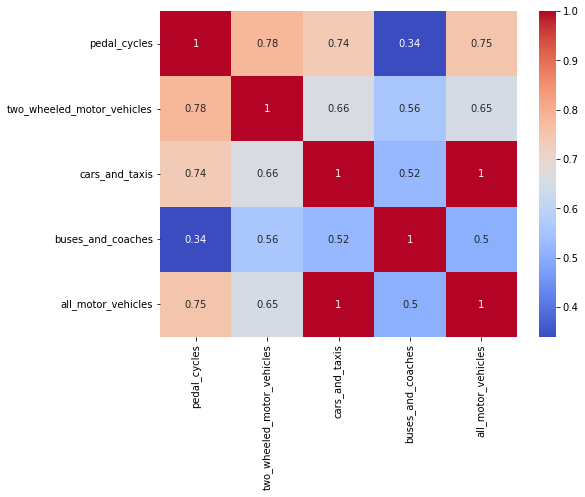

In [9]:
#Draw coorelation between various variables

plt.figure(figsize = (8,6))
sns.heatmap(df[['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'all_motor_vehicles']].corr(), cmap = 'coolwarm', annot = True)

# Create covariance between various variables

<AxesSubplot:>

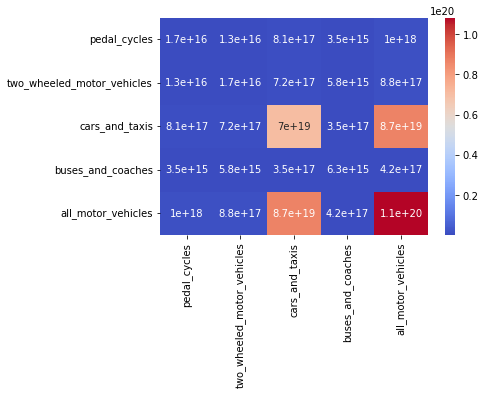

In [10]:
#Draw covariance between various variables

sns.heatmap(df[['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'all_motor_vehicles']].cov(), cmap = 'coolwarm', annot = True)

# Scatter plot between pedal cycles and two wheeled motor vehicles

Text(0.5, 1.0, 'pedal_cycles vs. two_weeled_motor_vehicles')

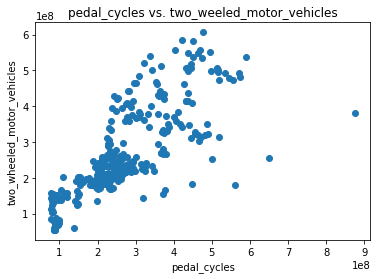

In [11]:
#Scatter plot between pedal_cycles and two_wheeled_motor_vehicles 

plt.scatter(df['pedal_cycles'], df['two_wheeled_motor_vehicles'])
plt.xlabel("pedal_cycles")
plt.ylabel("two_wheeled_motor_vehicles")
plt.title("pedal_cycles vs. two_weeled_motor_vehicles")

# Scaltter plot between allmotor vehicles and cars and taxis

Text(0.5, 1.0, 'all_motor_vehicles vs.cars_and_taxis')

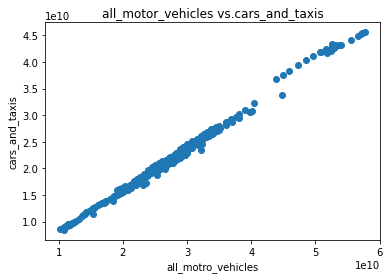

In [12]:
#Scaltter plot between all_motor_vehicles and cars_and_taxis

plt.scatter(df['all_motor_vehicles'], df['cars_and_taxis'])
plt.xlabel('all_motro_vehicles')
plt.ylabel('cars_and_taxis')
plt.title('all_motor_vehicles vs.cars_and_taxis')

# Plot pairwise relationship between all 5 variables

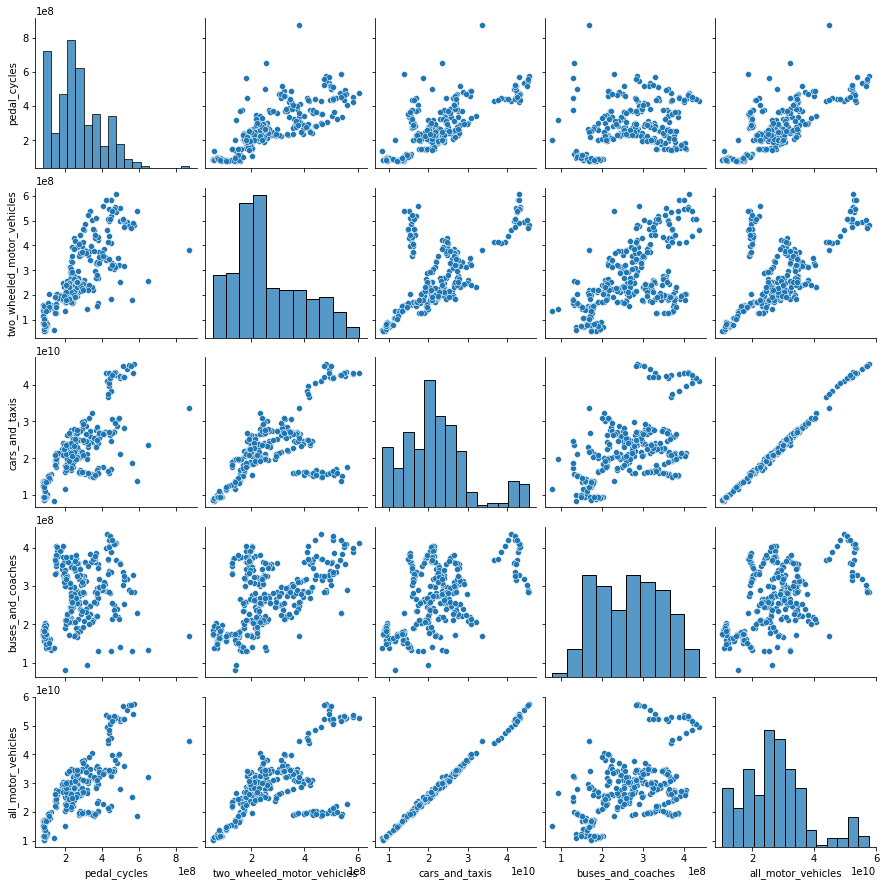

In [13]:
#Plot pairwise relationship between variables 

import seaborn as sns
sns.pairplot(df[['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'all_motor_vehicles']])

In [14]:
#Source code of this class is from textbook.

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

# Hypothesis  Test

In [15]:
#Test hypothesis by correlation permutation between pedal_cycles and two_wheeled_motor_vehicles 

cleaned = df.dropna(subset=['pedal_cycles', 'two_wheeled_motor_vehicles'])
data = cleaned['pedal_cycles'].values, cleaned['two_wheeled_motor_vehicles'].values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(f'pvalue : {pvalue}')
print(f'ht actual : {ht.actual}')
print(f'ht maxteststat() : {ht.MaxTestStat()}')

pvalue : 0.0
ht actual : 0.7814523080960614
ht maxteststat() : 0.23541343912680068


# Linear Regression bewteen pedal cycles and two wheeled motor vehicles

In [16]:
#Linear Regression bewteen pedal_cycles and two_wheeled_motor_vehicles
#f = "pedal_cycles ~ np.log(df['two_wheeled_motor_vehicles'])"
f = "pedal_cycles ~ df['two_wheeled_motor_vehicles']"
model = ols(formula=f, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pedal_cycles   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     480.0
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           1.21e-64
Time:                        14:43:14   Log-Likelihood:                -6047.5
No. Observations:                 308   AIC:                         1.210e+04
Df Residuals:                     306   BIC:                         1.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         6.026e+07   1.05e+07      5.747      0.000    3.96e+07    8.09e+07
df['two_wheeled_motor_vehicles']     0.7854      0.036     21.908      0.000       0.715       0.856
==============================================================================
Omnibus:                      139.151   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              822.297
Skew:                           1.779   Prob(JB):                    2.76e-179
Kurtosis:                      10.171   Cond. No.                     6.58e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression Plot

Text(0.5, 1.0, 'Linear Regression. pedal_cycles ~ two_wheeled_motor_vehicles')

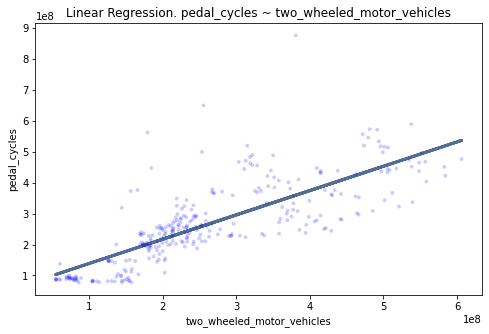

In [17]:
#Linear relationship functions and linear relationship between pedal_cycles and two_wheeled_motor_vehicles

def RunLinearModel(df):
    f = "pedal_cycles ~ df['two_wheeled_motor_vehicles']" 
    model = ols(formula=f, data=df)
    results = model.fit()
    return model, results

def PlotFittedValues(model, results, label=''):
    two_wheeled_motor_vehicles = model.exog[:,1]
    pedal_cycles = model.endog
    thinkplot.Scatter(two_wheeled_motor_vehicles, pedal_cycles, s=15, label=label)
    thinkplot.Plot(two_wheeled_motor_vehicles, results.fittedvalues, label='model')
    
model, results = RunLinearModel(df)    

#initialize the plt and then plot the model
plt.figure(figsize=(8,5))
PlotFittedValues(model, results)
plt.xlabel('two_wheeled_motor_vehicles')
plt.ylabel('pedal_cycles')
plt.title('Linear Regression. pedal_cycles ~ two_wheeled_motor_vehicles')


 #   THE                                                  END